In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test)= cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Access the shape of the training data
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)

# Access the shape of the testing data
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [4]:
x_train= x_train.astype('float32')/255.0
x_test= x_test.astype('float32')/255.0

In [5]:
# Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))

<Dense name=dense_3, built=False>

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

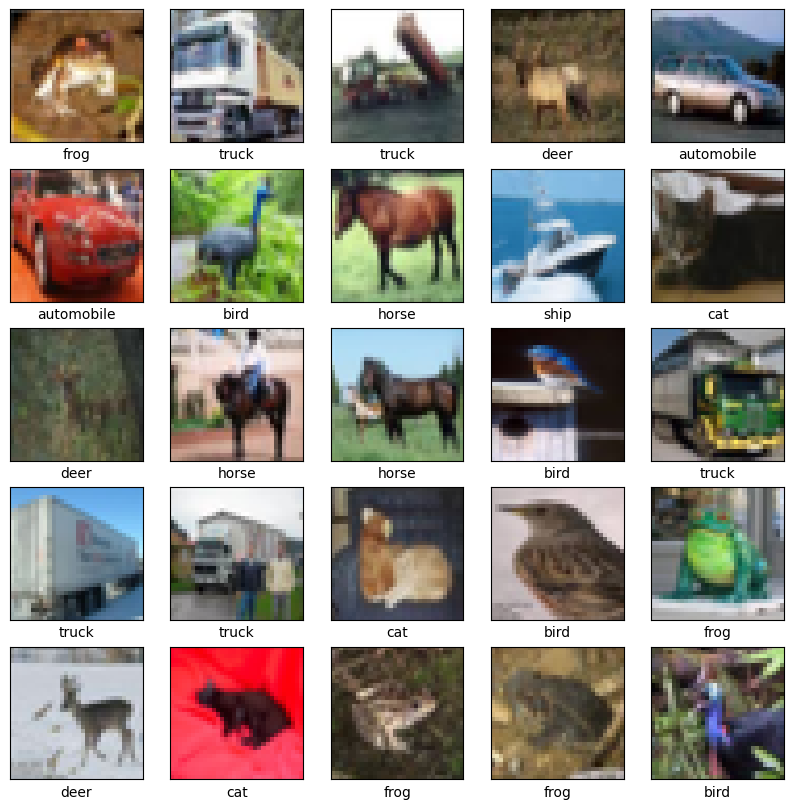

In [9]:
# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display a few images with their labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)

In [11]:
hist = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=20, validation_data=(x_test, y_test))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 57ms/step - accuracy: 0.2882 - loss: 1.9031 - val_accuracy: 0.4937 - val_loss: 1.3831
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 51ms/step - accuracy: 0.4791 - loss: 1.4297 - val_accuracy: 0.5723 - val_loss: 1.1988
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.5445 - loss: 1.2704 - val_accuracy: 0.6031 - val_loss: 1.1337
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.5812 - loss: 1.1793 - val_accuracy: 0.6222 - val_loss: 1.0673
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.6017 - loss: 1.1166 - val_accuracy: 0.6527 - val_loss: 1.0036
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.6214 - loss: 1.0763 - val_accuracy: 0.6549 - val_loss: 0.9739
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.6292 - loss: 1.0401 - val_accuracy: 0.6719 - val_loss: 0.9347
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.6451 - loss: 1.0071 - val_accurac

In [12]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy:{test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7416 - loss: 0.7583
Test accuracy:0.737500011920929


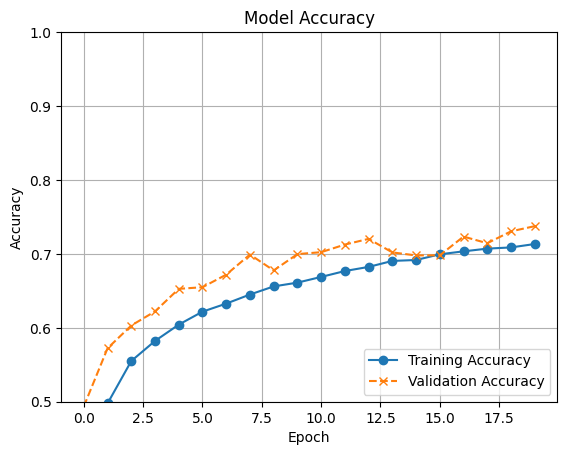

In [13]:
plt.plot(hist.history['accuracy'], label='Training Accuracy', marker='o', linestyle='-')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', marker='x', linestyle='--')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.grid(True)  # Add a grid for better readability
plt.legend(loc='lower right')
plt.show()

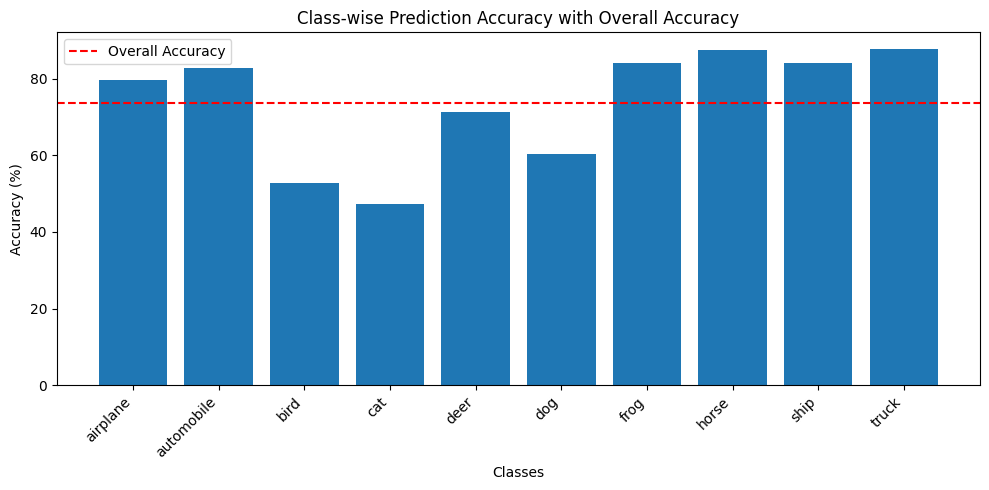

In [17]:
import numpy as np

# ... (previous code to calculate class_accuracy) ...

# Calculate overall accuracy
overall_accuracy = np.mean(predicted_labels == y_test.flatten()) * 100

# Create bar chart with overall accuracy line
plt.figure(figsize=(10, 5))
plt.bar(class_names, class_accuracy)
plt.axhline(y=overall_accuracy, color='red', linestyle='--', label='Overall Accuracy')
plt.title('Class-wise Prediction Accuracy with Overall Accuracy')
plt.xlabel('Classes')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45, ha='right')
plt.legend()  # Add legend to show overall accuracy line
plt.tight_layout()
plt.show()